In [21]:
from __future__ import print_function
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


from keras.datasets import mnist # pre defined already!!
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

The [MNIST](http://yann.lecun.com/exdb/mnist/) database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. 

Let's load MNIST dataset. 

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


As you see there're 60K images in train set and 10K in test set.
The size of image is 28x28 pixels.

This is grayscale image. In practise that means that each pixel could be from 0 (black) to 255 (white). 

Let's visualise some of them to be sure how it looks like.

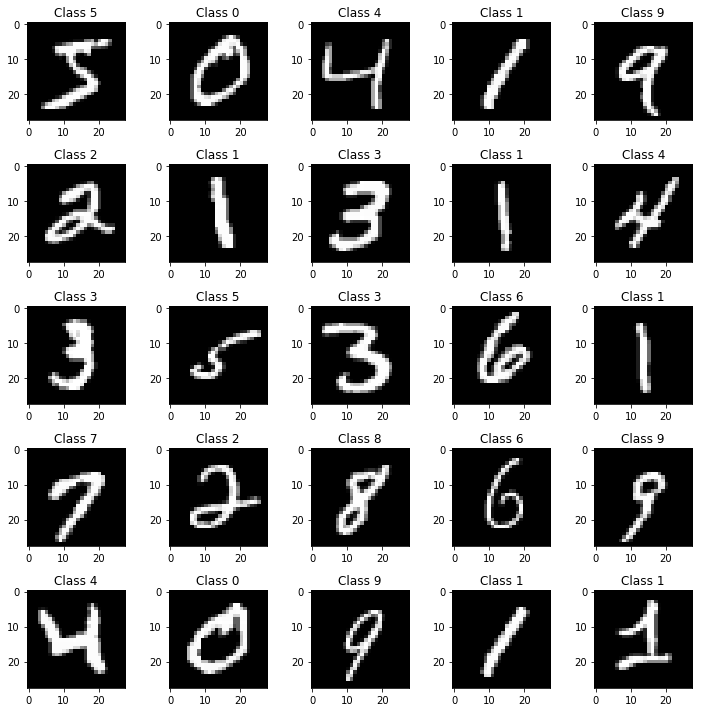

In [23]:
fig = plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[idx]))
    
plt.tight_layout()

Let's visualise it in numberic way (each pixel's value).

In [24]:
def plot_digit(digit, dem=28, font_size=12):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(14,14))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')

    for idx in range(dem):
        for jdx in range(dem):
            plt.text(idx*font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize=font_size, color="#000000")
            
    plt.show()

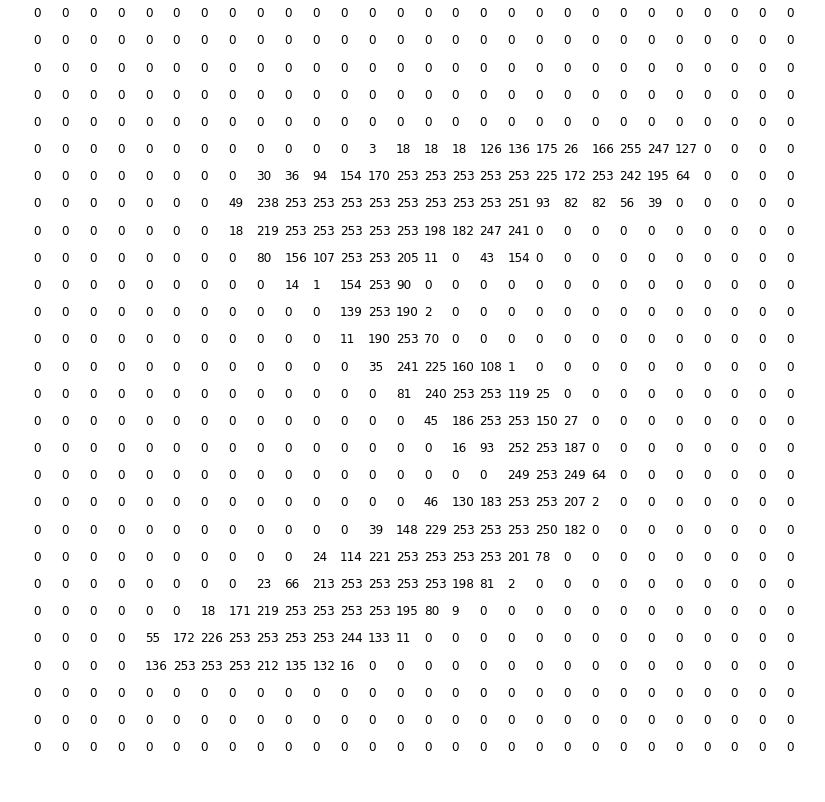

In [25]:
plot_digit(X_train[0])

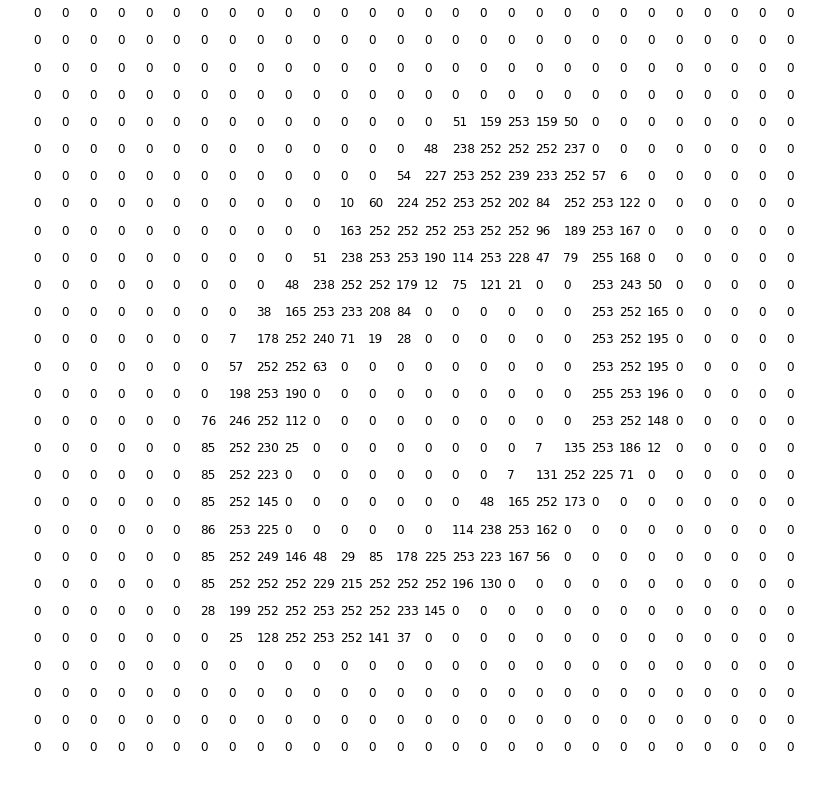

In [26]:
plot_digit(X_train[1])

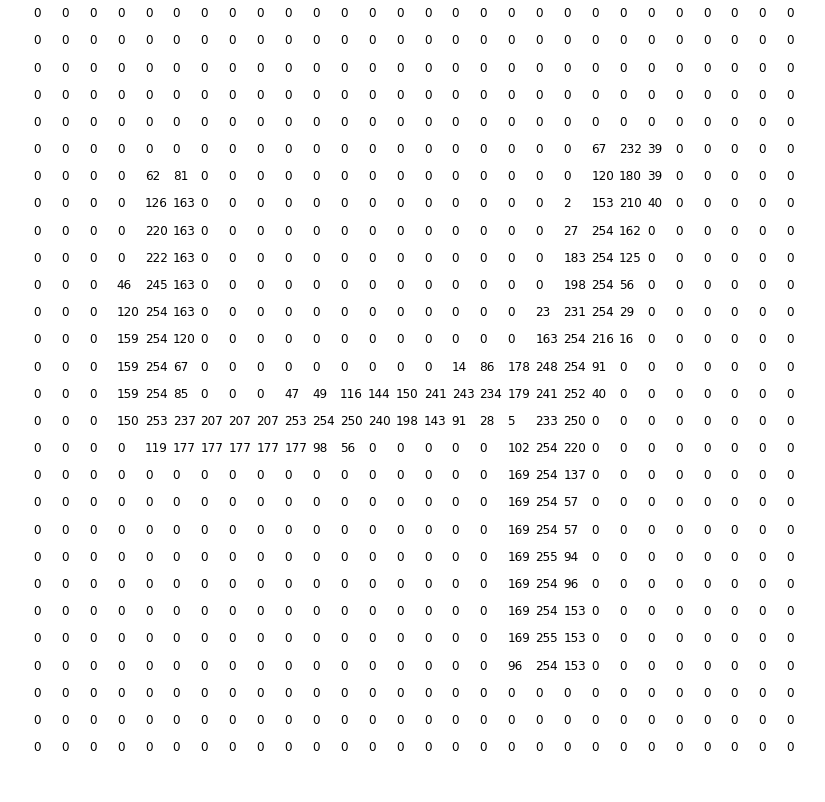

In [27]:
plot_digit(X_train[2])

## Goal: to build a model to recognize a handwritten digits (from 0 to 9).

In [28]:
seed = 2017 # to make a result reproduciable
np.random.seed(seed)

All data is converted to a single dimensional array before feeding it into the network
- Before: 28x28
- After: 1x784

In [29]:
if len(X_train.shape) == 3:
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


Normalize values by devide 255.
- Before: values from 0 to 255
- After: values from 0 to 1

In [30]:
X_train /= 255
X_test /= 255

Convert target variable (vector from 0 to 9) to binary matrix (for use with categorical_crossentropy)

In [31]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

Build a model neural network (https://en.wikipedia.org/wiki/Multilayer_perceptron)Build a model neural network ([MLP]())

In [32]:
model = Sequential()
model.add( Dense(512, input_dim=num_pixels, activation='relu'))
model.add( Dense(num_classes, init='normal', activation='softmax'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [34]:
model.fit(X_train, y_train,
          batch_size=1028, epochs=4, verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
4s - loss: 0.5879 - acc: 0.8477 - val_loss: 0.2688 - val_acc: 0.9256
Epoch 2/4
4s - loss: 0.2375 - acc: 0.9332 - val_loss: 0.1985 - val_acc: 0.9435
Epoch 3/4
4s - loss: 0.1805 - acc: 0.9496 - val_loss: 0.1600 - val_acc: 0.9542
Epoch 4/4
4s - loss: 0.1439 - acc: 0.9598 - val_loss: 0.1354 - val_acc: 0.9611


In [35]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.135432162361
Test accuracy: 0.9611


## Task
Before you have network with one hidden layer

* input: 784
* hidden1: 512
* output: 10
    
    
let's add one more hidden layer (e.g. 512 or smaller)

also you can try add dropout laer between hidden1 and hidden2 or hidden2 and output: `model.add(Dropout(0.2))`


In [38]:
model = Sequential()
model.add( Dense(512, input_dim=num_pixels, activation='relu'))
model.add( Dense(200, input_dim=num_pixels, activation='relu'))

#... add one more hidden layer here
model.add( Dense(num_classes, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model.fit(X_train, y_train,
          batch_size=1028, epochs=4, verbose=2,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
5s - loss: 0.4939 - acc: 0.8715 - val_loss: 0.2183 - val_acc: 0.9361
Epoch 2/4
5s - loss: 0.1733 - acc: 0.9504 - val_loss: 0.1386 - val_acc: 0.9589
Epoch 3/4
5s - loss: 0.1184 - acc: 0.9654 - val_loss: 0.1114 - val_acc: 0.9675
Epoch 4/4
5s - loss: 0.0873 - acc: 0.9746 - val_loss: 0.0975 - val_acc: 0.9699
Test score: 0.0974776179837
Test accuracy: 0.9699
